## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_md
import seaborn as sns
spacy.prefer_gpu()
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
import swifter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from pprint import pprint

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [2]:
# Opening JSON file 
f = open("C:\\Users\\harsh\\Downloads\\nlp project\\casestudy\\complaints.json")
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

## Data preparation

In [3]:
# Inspect the dataframe to understand the given data.
df.head()


,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [4]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [6]:
df = df[['_source.complaint_what_happened']]


In [7]:
df.rename(columns = {'_source.complaint_what_happened' : 'complaint_what_happened'}, inplace = True)

In [8]:
df.head()

,complaint_what_happened
0,
1,Good morning my name is XXXX XXXX and I apprec...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...
3,
4,


In [9]:
#Assign new column names
df.isna().sum()

complaint_what_happened    0
dtype: int64

In [10]:
len(df[df['complaint_what_happened']==""])/len(df)

0.7309258999144459

In [11]:
# Removing empty compaints
df = df[df['complaint_what_happened']!=""].reset_index()

In [12]:
df.drop('index', axis = 1, inplace = True)

## Prepare the text for topic modeling

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


After cleaning operations :
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [13]:
import re
def removeTextBrackets(x):
    x = re.sub('\[(.*?)\]', "", x)
    return x

In [14]:
import spacy
nlp = spacy.load("en_core_web_md")

def lemmatize(s):
    sent = nlp(s, disable=['parser','ner'])
    l = []
    string = ""
    for token in sent:
        if token.tag_[:2] == 'NN':
            l.append(token.lemma_)
    string = " ".join(l)
    return string

In [15]:
def text_prep(series):
    series = series.str.lower()
    series = series.swifter.apply(lambda x: removeTextBrackets(x))
    series = series.swifter.apply(lambda x: re.sub(r'[^\w\s]', '', x)) 
    series = series.swifter.apply(lambda x: re.sub(r'\w*\d\w*', '', x))
    series = series.swifter.apply(lambda x: lemmatize(x))
    return series

In [16]:
df_clean = pd.DataFrame()
df_clean['complaint_POS_removed'] = text_prep(df['complaint_what_happened'])

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [17]:
df_clean.head()

,complaint_POS_removed
0,morning name xxxx xxxx stop bank cardmember se...
1,xxxx xxxx card agent anniversary date agent in...
2,chase card application identity consent servic...
3,xxxx xxxx ticket offer ticket reward card info...
4,son check chase account fund chase bank accoun...


### The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [18]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean['complaint_POS_removed'] = df_clean['complaint_POS_removed'].apply(lambda x : x.replace('xxxx', ''))
df_clean['complaint_POS_removed'] = df_clean['complaint_POS_removed'].apply(lambda x : x.replace('xxxxxxxx', ''))

In [19]:
df_clean['complaint_POS_removed'] = df_clean['complaint_POS_removed'].str.strip()

In [20]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaint_POS_removed
0,morning name stop bank cardmember service de...
1,card agent anniversary date agent information ...
2,chase card application identity consent servic...
3,ticket offer ticket reward card information of...
4,son check chase account fund chase bank accoun...
...,...
21067,chase card customer decade solicitation credit...
21068,wednesday chas visa credit card provider cl...
21069,pay risk consumer chase bank app chase year ba...
21070,credit yr chase credit card chase freedom pro...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




<AxesSubplot:>

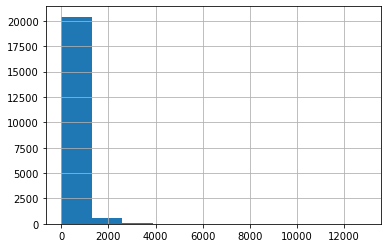

In [21]:
# Write your code here to visualise the data according to the 'Complaint' character length
df_clean['complaint_POS_removed'].str.len().hist()

In [22]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top 40 words by frequency among all the articles after processing the text.

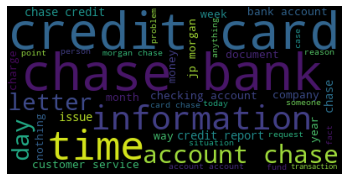

In [23]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
wc = WordCloud(stopwords =stops , max_words=40).generate(' '.join(df_clean['complaint_POS_removed']))
fig = plt.figure(1)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [24]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
from sklearn.feature_extraction.text import CountVectorizer

def count_freq(n_gram):
    corpus = df_clean['Complaint_clean']
    vec = CountVectorizer(ngram_range=(n_gram, n_gram)).fit(corpus)
    bow = vec.transform(corpus)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq


In [25]:
dic = {1:'unigram', 2: 'bigram', 3:'trigram'}
def visualize(ngram):
    df = pd.DataFrame(count_freq(ngram)[:30], columns = [dic[ngram] , 'count'])
    plt.figure(figsize=(15,6))
    sns.barplot(x=dic[ngram], y='count', data=df, palette="coolwarm")
    plt.xticks(rotation=90)
    plt.title("Top 30 "+str(dic[ngram])+" in the Complaint text after removing stop words and lemmatization", fontsize=20)
    plt.show()

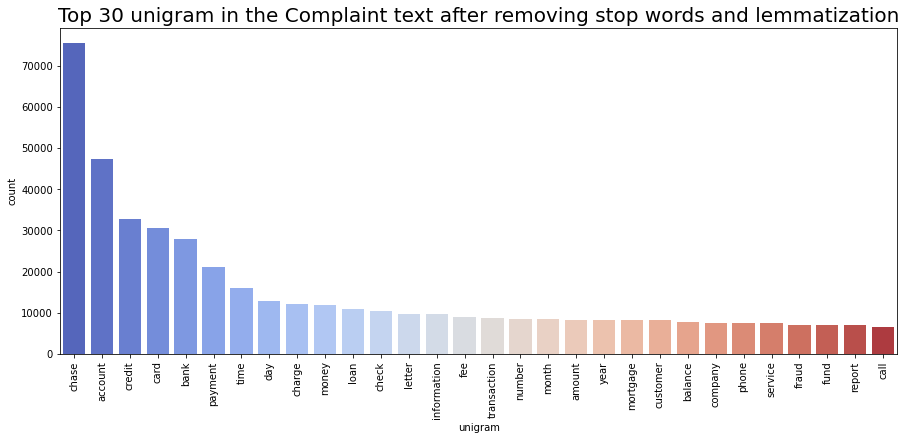

In [26]:
visualize(1)

In [27]:
#Print the top 10 words in the unigram frequency
count_freq(1)[:10]

[('chase', 75392),
 ('account', 47353),
 ('credit', 32670),
 ('card', 30481),
 ('bank', 28009),
 ('payment', 21155),
 ('time', 16019),
 ('day', 12983),
 ('charge', 12074),
 ('money', 11956)]

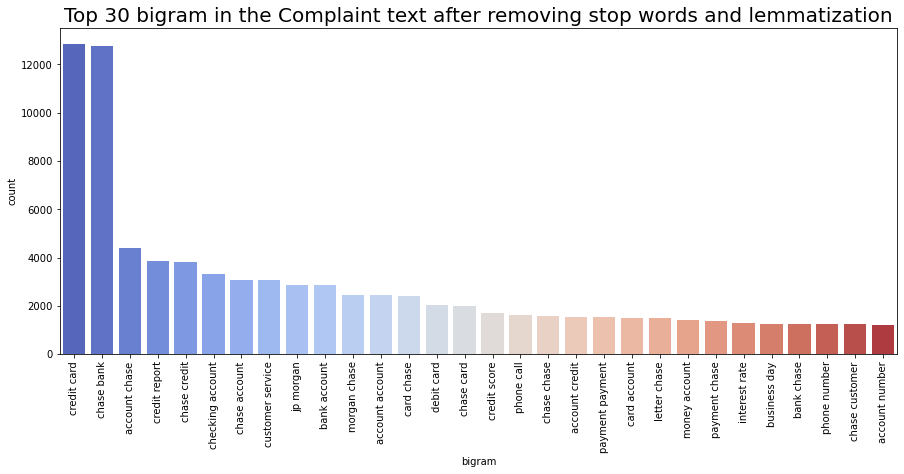

In [28]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
visualize(2)

In [29]:
#Print the top 10 words in the bigram frequency
count_freq(2)[:10]

[('credit card', 12868),
 ('chase bank', 12761),
 ('account chase', 4407),
 ('credit report', 3856),
 ('chase credit', 3799),
 ('checking account', 3331),
 ('chase account', 3083),
 ('customer service', 3083),
 ('jp morgan', 2858),
 ('bank account', 2854)]

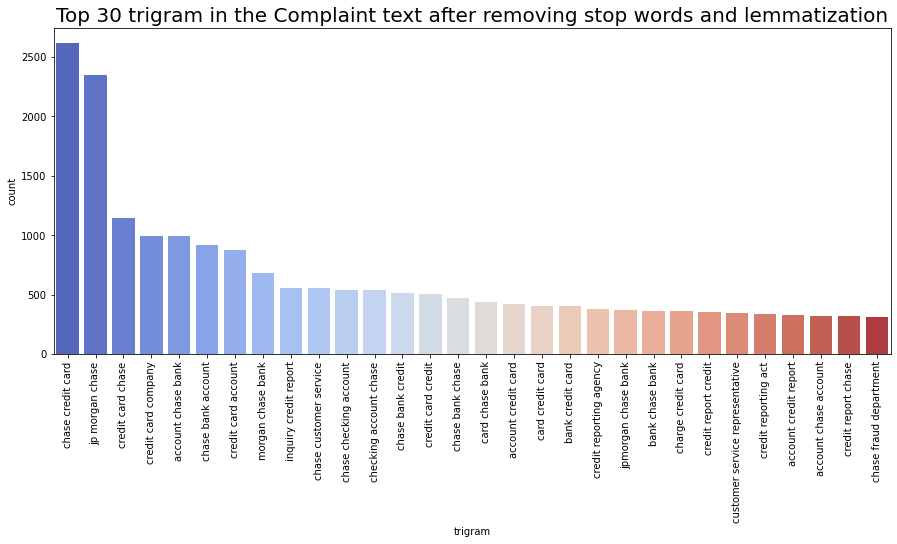

In [30]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
visualize(3)

In [31]:
#Print the top 10 words in the trigram frequency
count_freq(3)[:10]

[('chase credit card', 2615),
 ('jp morgan chase', 2347),
 ('credit card chase', 1142),
 ('credit card company', 998),
 ('account chase bank', 995),
 ('chase bank account', 917),
 ('credit card account', 873),
 ('morgan chase bank', 682),
 ('inquiry credit report', 553),
 ('chase customer service', 552)]

In [32]:
#All masked texts has been removed
df_clean

,complaint_POS_removed,Complaint_clean
0,morning name stop bank cardmember service de...,morning name stop bank cardmember service de...
1,card agent anniversary date agent information ...,card agent anniversary date agent information ...
2,chase card application identity consent servic...,chase card application identity consent servic...
3,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...
4,son check chase account fund chase bank accoun...,son check chase account fund chase bank accoun...
...,...,...
21067,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...
21068,wednesday chas visa credit card provider cl...,wednesday chas visa credit card provider cl...
21069,pay risk consumer chase bank app chase year ba...,pay risk consumer chase bank app chase year ba...
21070,credit yr chase credit card chase freedom pro...,credit yr chase credit card chase freedom pro...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [33]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.95)

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [34]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
X = tfidf.fit_transform(df_clean['Complaint_clean'])

In [35]:
len(tfidf.get_feature_names())

7131

In [36]:
X.shape

(21072, 7131)

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

Task to be performed:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [37]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [38]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5
#keep the random_state =40
nmf_model = NMF(num_topics, random_state = 40, max_iter = 400)

In [39]:
W = nmf_model.fit_transform(X)
H = nmf_model.components_

In [40]:
topic_df = pd.DataFrame(columns = ['word '+str(i) for i in range(1, 16)], index = ['topic '+str(i) for i in range(1,6)])

x = 0
for topic in H.argsort()[:,-15:]:
    y = 0
    for word in topic:
        if x >= topic_df.shape[0] or y >= topic_df.shape[1]:
            break
        topic_df.iloc[x, y] = tfidf.get_feature_names()[word]
        y+=1
    x+=1    
topic_df      

,word 1,word 2,word 3,word 4,word 5,word 6,word 7,word 8,word 9,word 10,word 11,word 12,word 13,word 14,word 15
topic 1,claim,fee,business,number,transaction,day,branch,deposit,checking,fund,money,chase,check,bank,account
topic 2,customer,claim,company,time,fee,merchant,service,purchase,fraud,transaction,dispute,credit,chase,charge,card
topic 3,morgan,house,rate,foreclosure,document,time,bank,letter,year,property,modification,home,chase,mortgage,loan
topic 4,jpmcb,limit,application,bureaus,information,reporting,company,debt,chase,score,account,card,inquiry,report,credit
topic 5,account,auto,chase,credit,bill,date,time,day,amount,statement,month,interest,fee,balance,payment


In [41]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topics = {'topic 5' : 'Others',
          'topic 3'  : 'Loan and Mortgage',
          'topic 4' : 'Credit card service',
          'topic 2'  : 'Dispute and Fraud',
          'topic 1' : 'bank account service'}


In [42]:
W.shape

(21072, 5)

In [43]:
W = pd.DataFrame(W, columns = ['topic '+str(i) for i in range(1,6)])

In [44]:
W['max topic'] = W.apply(lambda x : topics.get(x.idxmax()) , axis = 1)

In [45]:
W.head()

,topic 1,topic 2,topic 3,topic 4,topic 5,max topic
0,0.022481,0.001661,0.020358,0.015490,0.007220,bank account service
1,0.006927,0.015000,0.001757,0.003162,0.002031,Dispute and Fraud
2,0.000000,0.025563,0.002362,0.034728,0.000000,Credit card service
3,0.019186,0.021477,0.019418,0.052349,0.000000,Credit card service
4,0.073629,0.000149,0.006614,0.000000,0.000000,bank account service


In [46]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = W['max topic']

In [47]:
df_clean.head()

,complaint_POS_removed,Complaint_clean,Topic
0,morning name stop bank cardmember service de...,morning name stop bank cardmember service de...,bank account service
1,card agent anniversary date agent information ...,card agent anniversary date agent information ...,Dispute and Fraud
2,chase card application identity consent servic...,chase card application identity consent servic...,Credit card service
3,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...,Credit card service
4,son check chase account fund chase bank accoun...,son check chase account fund chase bank accoun...,bank account service


In [48]:
#Print the first 5 Complaint for each of the Topics
df_clean_sample=df_clean.groupby('Topic').head(5)
df_clean_sample.sort_values('Topic')

,complaint_POS_removed,Complaint_clean,Topic
9,chase credit card datum credit report company ...,chase credit card datum credit report company ...,Credit card service
2,chase card application identity consent servic...,chase card application identity consent servic...,Credit card service
3,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...,Credit card service
5,inquiry,inquiry,Credit card service
11,time attempt inquiry creditor inquiry report a...,time attempt inquiry creditor inquiry report a...,Credit card service
1,card agent anniversary date agent information ...,card agent anniversary date agent information ...,Dispute and Fraud
19,purchase amount transaction dispute case ch...,purchase amount transaction dispute case ch...,Dispute and Fraud
8,payment retailer chase pay chase website scam...,payment retailer chase pay chase website scam...,Dispute and Fraud
14,chase amazon card catering order brother funer...,chase amazon card catering order brother funer...,Dispute and Fraud
16,sofa love seat table chair debit card bank vis...,sofa love seat table chair debit card bank vis...,Dispute and Fraud


In [49]:
df_clean_sample

,complaint_POS_removed,Complaint_clean,Topic
0,morning name stop bank cardmember service de...,morning name stop bank cardmember service de...,bank account service
1,card agent anniversary date agent information ...,card agent anniversary date agent information ...,Dispute and Fraud
2,chase card application identity consent servic...,chase card application identity consent servic...,Credit card service
3,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...,Credit card service
4,son check chase account fund chase bank accoun...,son check chase account fund chase bank accoun...,bank account service
5,inquiry,inquiry,Credit card service
6,notice jp morgan chase account debit card tues...,notice jp morgan chase account debit card tues...,bank account service
7,summer month decline income employment month p...,summer month decline income employment month p...,Others
8,payment retailer chase pay chase website scam...,payment retailer chase pay chase website scam...,Dispute and Fraud
9,chase credit card datum credit report company ...,chase credit card datum credit report company ...,Credit card service


## Supervised model to predict any new complaints to the relevant Topics.

In [50]:
#Create the dictionary again of Topic names and Topics

Topic_names = {'Credit card service' : 0,
               'Loan and Mortgage' : 1,
               'Dispute and Fraud' : 2,
               'bank account service' : 3,
                'Others' : 4}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [51]:
df_clean

,complaint_POS_removed,Complaint_clean,Topic
0,morning name stop bank cardmember service de...,morning name stop bank cardmember service de...,3
1,card agent anniversary date agent information ...,card agent anniversary date agent information ...,2
2,chase card application identity consent servic...,chase card application identity consent servic...,0
3,ticket offer ticket reward card information of...,ticket offer ticket reward card information of...,0
4,son check chase account fund chase bank accoun...,son check chase account fund chase bank accoun...,3
...,...,...,...
21067,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,2
21068,wednesday chas visa credit card provider cl...,wednesday chas visa credit card provider cl...,2
21069,pay risk consumer chase bank app chase year ba...,pay risk consumer chase bank app chase year ba...,2
21070,credit yr chase credit card chase freedom pro...,credit yr chase credit card chase freedom pro...,4


In [52]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean.iloc[:, 1:]

In [53]:
training_data

,Complaint_clean,Topic
0,morning name stop bank cardmember service de...,3
1,card agent anniversary date agent information ...,2
2,chase card application identity consent servic...,0
3,ticket offer ticket reward card information of...,0
4,son check chase account fund chase bank accoun...,3
...,...,...
21067,chase card customer decade solicitation credit...,2
21068,wednesday chas visa credit card provider cl...,2
21069,pay risk consumer chase bank app chase year ba...,2
21070,credit yr chase credit card chase freedom pro...,4


#### Data Preprocessing:
* Create the train & test data using the train_test_split on the tf-idf & topics
* Create the vector counts using Count Vectoriser on train data
* Transform the word vector to tf-idf 



In [54]:
# Class division
training_data['Topic'].value_counts()

2    5938
3    5773
1    3873
0    2951
4    2537
Name: Topic, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(training_data['Complaint_clean'], training_data['Topic'], test_size = 0.2, random_state = 40, stratify =  training_data['Topic'])
#Write your code to get the Vector count
cvec = CountVectorizer(ngram_range=(1,1))
vec = cvec.fit(x_train)
bow = vec.transform(x_train)

#Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(bow)

In [56]:
X_test_bow = vec.transform(x_test)
X_test_tfidf = tfidf_transformer.transform(X_test_bow)

## Model Training and Evaluations

In [57]:
# Write your code here to build any 3 models and evaluate them using the required metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import xgboost

In [58]:
# Hyper params tuning
def gridSearchCV(params, model) :
    cv = StratifiedKFold(n_splits=5)
    gcv = GridSearchCV(estimator = model, param_grid = params, cv = cv, n_jobs = -1)
    gcv.fit(X_train_tfidf, y_train)
    return gcv.best_params_, gcv.best_estimator_

In [59]:
# Evaluation metrics
list_topics = ["Credit card service", "Loan and Mortgage", "Dispute and Fraud","bank account service","Others"]
def eval(y_test, y_pred) :
    print(classification_report(y_test, y_pred,  target_names = list_topics))
    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat, annot = True, cbar=None, cmap="Blues", fmt='d', xticklabels=list_topics, yticklabels=list_topics)

### Logistic Regression

In [60]:
# lr = LogisticRegression(max_iter = 200)
# params = {'C' : [0.1,0.5,1,2,], 'penalty' : ['l1', 'l2'], 'solver' : ['saga']}
# best_param, best_model = gridSearchCV(params, lr)

In [61]:
m1 = LogisticRegression(C = 2, penalty = 'l1', solver = 'saga', max_iter = 200, n_jobs = -1).fit(X_train_tfidf, y_train)
y_pred1 = m1.predict(X_test_tfidf)

                      precision    recall  f1-score   support

 Credit card service       0.98      0.97      0.98       590
   Loan and Mortgage       0.97      0.98      0.97       775
   Dispute and Fraud       0.98      0.98      0.98      1188
bank account service       0.99      0.98      0.99      1155
              Others       0.97      0.98      0.97       507

            accuracy                           0.98      4215
           macro avg       0.98      0.98      0.98      4215
        weighted avg       0.98      0.98      0.98      4215



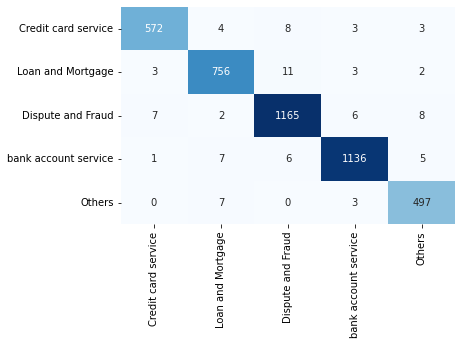

In [62]:
eval(y_test, y_pred1)

### Decision Tree

In [63]:
m2 = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_leaf=15, max_features=None).fit(X_train_tfidf, y_train)
y_pred2 = m2.predict(X_test_tfidf)

                      precision    recall  f1-score   support

 Credit card service       0.81      0.80      0.80       590
   Loan and Mortgage       0.83      0.83      0.83       775
   Dispute and Fraud       0.82      0.87      0.85      1188
bank account service       0.88      0.86      0.87      1155
              Others       0.84      0.77      0.80       507

            accuracy                           0.84      4215
           macro avg       0.84      0.83      0.83      4215
        weighted avg       0.84      0.84      0.84      4215



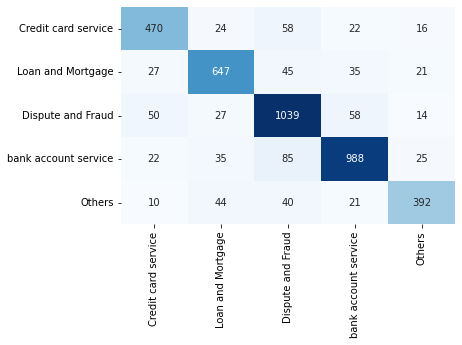

In [64]:
eval(y_test, y_pred2)

### Random Forest

In [65]:
# rf = RandomForestClassifier(n_jobs = -1)
# params = {'n_estimators' : [100, 200, 500], 'criterion' : ['gini', 'entropy'], 'max_depth' : [5,10, None], 'min_samples_split' : [2, 5, 7],
#     'min_samples_leaf' : [1, 3, 5] }
# best_param, best_model = gridSearchCV(params, rf)

In [66]:
m3 = RandomForestClassifier(criterion = 'gini', max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500).fit(X_train_tfidf, y_train)
y_pred3 = m3.predict(X_test_tfidf)

                      precision    recall  f1-score   support

 Credit card service       0.90      0.82      0.86       590
   Loan and Mortgage       0.88      0.90      0.89       775
   Dispute and Fraud       0.86      0.93      0.89      1188
bank account service       0.87      0.95      0.91      1155
              Others       0.92      0.61      0.73       507

            accuracy                           0.88      4215
           macro avg       0.89      0.84      0.86      4215
        weighted avg       0.88      0.88      0.87      4215



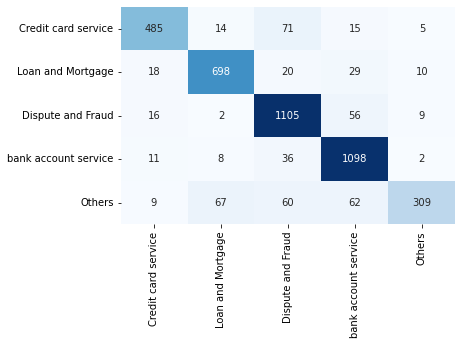

In [67]:
eval(y_test, y_pred3)

### XGBoost

In [68]:
# tree method = gpu_hist
# params = {'booster': ['gbtree'], 'eta' : [0.3]}
# xgb = xgboost.XGBClassifier(tree_method = 'gpu_hist',predictor="gpu_predictor", n_jobs = -1)
# best_param, best_model = gridSearchCV(params, xgb)

In [69]:
m4 = xgboost.XGBClassifier(n_jobs = -1, max_depth = 5).fit(X_train_tfidf, y_train)
y_pred4 = m4.predict(X_test_tfidf)

C:\Users\harsh\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[01:01:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


                      precision    recall  f1-score   support

 Credit card service       0.93      0.95      0.94       590
   Loan and Mortgage       0.95      0.93      0.94       775
   Dispute and Fraud       0.94      0.95      0.95      1188
bank account service       0.96      0.95      0.96      1155
              Others       0.93      0.92      0.92       507

            accuracy                           0.94      4215
           macro avg       0.94      0.94      0.94      4215
        weighted avg       0.94      0.94      0.94      4215



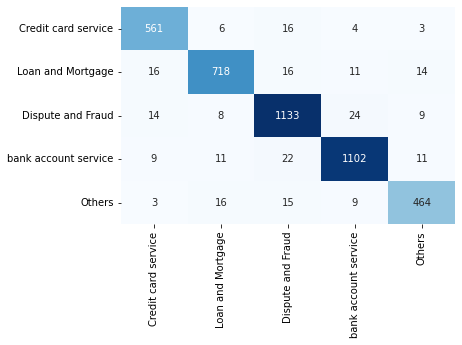

In [70]:
eval(y_test, y_pred4)

## Logistic regression and XGBoost have the best performance in terms of accuracy and F1 score.


In [71]:
import pickle
# Save pickle file
pickle.dump( m1, open("logreg_model.pkl", "wb"))
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))
pickle.dump(vec.vocabulary_, open("count_vector.pkl","wb"))

### Model Testing and Inference

In [72]:
def predict_topic(text):
    
    target_names = list_topics
    loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
    loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
    loaded_model = pickle.load(open("logreg_model.pkl","rb"))

    X_new_counts = loaded_vec.transform(text)
    X_new_tfidf = loaded_tfidf.transform(X_new_counts)
    predicted = loaded_model.predict(X_new_tfidf)

    return target_names[predicted[0]]

In [73]:
# Create a dataframe of some sample customer complaints
df_new = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs", 
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "Yesterday, I received a fraudulent email regarding renewal of my services.",
                                  "What is the procedure to know my CIBIL score?",
                                  "I need to know the number of bank branches and their locations in the city of Dubai"]})


In [74]:
df_new['complaints_clean'] = text_prep(df_new['complaints'])

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

In [75]:
df_new['topics'] = df_new['complaints_clean'].apply(lambda x: predict_topic([x]))

In [76]:
df_new

,complaints,complaints_clean,topics
0,I can not get from chase who services my mortg...,chase mortgage loan doc,Loan and Mortgage
1,The bill amount of my credit card was debited ...,bill amount credit card matter,Dispute and Fraud
2,I want to open a salary account at your downto...,salary account downtown branch procedure,bank account service
3,"Yesterday, I received a fraudulent email regar...",yesterday email renewal service,Dispute and Fraud
4,What is the procedure to know my CIBIL score?,procedure score,Credit card service
5,I need to know the number of bank branches and...,number bank branch location city dubai,bank account service
